### Custom BERT implementation

In [1]:
%cd ../..
import torch
from inpainting.models import FOOBERT
from inpainting.trainer import Trainer
from inpainting.datasets import MNIST
from inpainting.utils import configure_environment

configure_environment()

/home/ventus/.cache/pypoetry/virtualenvs/image-inpainting-rudDGIrt-py3.12/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/ventus/image-inpainting


/home/ventus/.cache/pypoetry/virtualenvs/image-inpainting-rudDGIrt-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Seed set to 30937


Device set to cuda


In [2]:
mnist = MNIST(frac=0.05, clusters=35, unimask=False, shape=2)
weights = 1/mnist.distribution

In [3]:
model = FOOBERT(
    vocab_size = mnist.tokens,                      # BERT's vocabulary size
    embed_size = mnist.tokens * 12,                 # Hidden size
    num_layers = 8,                                 # Number of Transformer layers
    num_heads = 12,                                 # Numbertargets of attention heads
    ff_hidden = 3200,                               # Feed-forward hidden size
    max_len = (28//mnist.shape)**2,                 # Maximum sequence length
    dropout = 0.00,
	# ce_weights=weights,
	patches=mnist.itop(torch.arange(mnist.clusters)),
)

In [4]:
Trainer(model, mnist).train(epochs=50, batch_size=100, lr=2e-4)

running on device cuda
Epoch: 0.00	RMSE: 60.99	Loss: 2.71e+03	Learning Rate: 1.99e-04
Epoch: 0.00	RMSE: 47.41	Loss: 2.25e+03	Learning Rate: 1.97e-04
Epoch: 0.00	RMSE: 137.93	Loss: 1.86e+03	Learning Rate: 1.96e-04
Epoch: 1.00	RMSE: 86.43	Loss: 1.96e+03	Learning Rate: 1.95e-04
Epoch: 1.00	RMSE: 100.22	Loss: 1.52e+03	Learning Rate: 1.93e-04
Epoch: 1.00	RMSE: 93.89	Loss: 1.61e+03	Learning Rate: 1.92e-04
Epoch: 2.00	RMSE: 94.35	Loss: 1.69e+03	Learning Rate: 1.91e-04
Epoch: 2.00	RMSE: 96.56	Loss: 1.58e+03	Learning Rate: 1.89e-04
Epoch: 2.00	RMSE: 99.43	Loss: 1.73e+03	Learning Rate: 1.88e-04
Epoch: 3.00	RMSE: 101.50	Loss: 1.74e+03	Learning Rate: 1.87e-04
Epoch: 3.00	RMSE: 93.73	Loss: 1.68e+03	Learning Rate: 1.85e-04
Epoch: 3.00	RMSE: 115.15	Loss: 1.66e+03	Learning Rate: 1.84e-04
Epoch: 4.00	RMSE: 105.91	Loss: 1.49e+03	Learning Rate: 1.83e-04
Epoch: 4.00	RMSE: 105.87	Loss: 1.56e+03	Learning Rate: 1.81e-04
Epoch: 4.00	RMSE: 125.82	Loss: 1.49e+03	Learning Rate: 1.80e-04
Epoch: 5.00	RMSE: 105.22	

Traceback (most recent call last):
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 303, in _run_finalizers
    finalizer()
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 227, in __call__
    res = self._callback(*self._args, **self._kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 136, in _remove_temp_dir
    rmtree(tempdir, onerror=onerror)
  File "/usr/lib64/python3.12/shutil.py", line 759, in rmtree
    _rmtree_safe_fd(stack, onexc)
  File "/usr/lib64/python3.12/shutil.py", line 703, in _rmtree_safe_fd
    onexc(func, path, err)
  File "/usr/lib64/python3.12/shutil.py", line 750, in onexc
    return onerror(func, path, exc_info)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/shutil.py", line 662, in _rmtree_safe_fd
    os.rmdir(name, dir_fd=dirfd)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-qy08jf38'


Epoch: 11.00	RMSE: 99.35	Loss: 1.48e+03	Learning Rate: 1.53e-04
Epoch: 11.00	RMSE: 84.64	Loss: 1.71e+03	Learning Rate: 1.52e-04
Epoch: 12.00	RMSE: 82.16	Loss: 1.52e+03	Learning Rate: 1.51e-04
Epoch: 12.00	RMSE: 76.93	Loss: 1.46e+03	Learning Rate: 1.49e-04
Epoch: 12.00	RMSE: 91.85	Loss: 1.61e+03	Learning Rate: 1.48e-04
Epoch: 13.00	RMSE: 92.43	Loss: 1.49e+03	Learning Rate: 1.47e-04
Epoch: 13.00	RMSE: 79.22	Loss: 1.44e+03	Learning Rate: 1.45e-04
Epoch: 13.00	RMSE: 65.51	Loss: 1.68e+03	Learning Rate: 1.44e-04
Epoch: 14.00	RMSE: 77.96	Loss: 1.60e+03	Learning Rate: 1.43e-04
Epoch: 14.00	RMSE: 66.34	Loss: 1.63e+03	Learning Rate: 1.41e-04
Epoch: 14.00	RMSE: 81.81	Loss: 1.52e+03	Learning Rate: 1.40e-04
Epoch: 15.00	RMSE: 76.01	Loss: 1.41e+03	Learning Rate: 1.39e-04
Epoch: 15.00	RMSE: 62.07	Loss: 1.64e+03	Learning Rate: 1.37e-04
Epoch: 15.00	RMSE: 67.50	Loss: 1.61e+03	Learning Rate: 1.36e-04
Epoch: 16.00	RMSE: 70.96	Loss: 1.65e+03	Learning Rate: 1.35e-04
Epoch: 16.00	RMSE: 89.51	Loss: 1.30e+03	

Traceback (most recent call last):
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 303, in _run_finalizers
    finalizer()
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 227, in __call__
    res = self._callback(*self._args, **self._kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 136, in _remove_temp_dir
    rmtree(tempdir, onerror=onerror)
  File "/usr/lib64/python3.12/shutil.py", line 759, in rmtree
    _rmtree_safe_fd(stack, onexc)
  File "/usr/lib64/python3.12/shutil.py", line 703, in _rmtree_safe_fd
    onexc(func, path, err)
  File "/usr/lib64/python3.12/shutil.py", line 750, in onexc
    return onerror(func, path, exc_info)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/shutil.py", line 662, in _rmtree_safe_fd
    os.rmdir(name, dir_fd=dirfd)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-k9i11m0s'


Epoch: 25.00	RMSE: 80.21	Loss: 1.42e+03	Learning Rate: 9.60e-05
Epoch: 26.00	RMSE: 76.89	Loss: 1.30e+03	Learning Rate: 9.47e-05
Epoch: 26.00	RMSE: 72.49	Loss: 1.49e+03	Learning Rate: 9.33e-05
Epoch: 26.00	RMSE: 63.92	Loss: 1.42e+03	Learning Rate: 9.20e-05
Epoch: 27.00	RMSE: 62.95	Loss: 1.54e+03	Learning Rate: 9.07e-05


KeyboardInterrupt: 

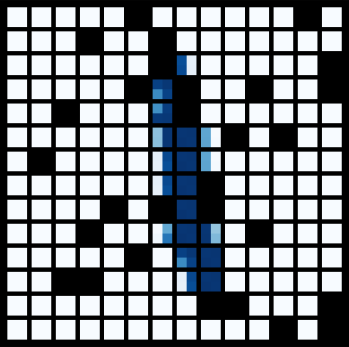

In [62]:
x = mnist[6]["input_ids"]
mnist.plot_sample(x)

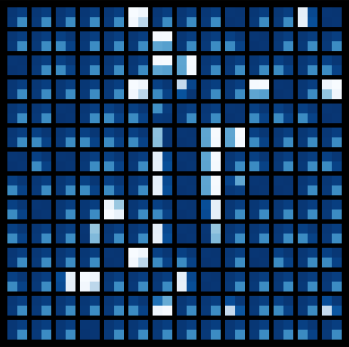

In [63]:
y = model(x.unsqueeze(0).cuda()).logits.argmax(dim=-1).cpu()
mnist.plot_sample(y)